In [2]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [3]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("Cali_Files/*.cali")) # sample*.cali

(1/2) Reading Files:   0%|          | 0/899 [00:00<?, ?it/s]/home/kachhabra02/.local/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1204: RuntimeWarning: invalid value encountered in cast
  if not (lk == lk.astype(rk.dtype))[~np.isnan(lk)].all():
(1/2) Reading Files:   0%|          | 0/899 [00:00<?, ?it/s]/home/kachhabra02/.local/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1204: RuntimeWarning: invalid value encountered in cast
  if not (lk == lk.astype(rk.dtype))[~np.isnan(lk)].all():
(1/2) Reading Files:   0%|          | 2/899 [00:00<00:57, 15.69it/s]/home/kachhabra02/.local/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1204: RuntimeWarning: invalid value encountered in cast
  if not (lk == lk.astype(rk.dtype))[~np.isnan(lk)].all():
(1/2) Reading Files:   0%|          | 2/899 [00:00<00:57, 15.69it/s]/home/kachhabra02/.local/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1204: RuntimeWarning: invalid value encountered in cast
  if not (lk ==

Group Performance data by `matrix_size` in the Thicket metadata table.

In [4]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("algorithm")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type", "algorithm"]).sort_index()

tk.dataframe.head()

profile  \
node                                 num_procs input_size input_type       algorithm               
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed bitonic    3402180218   
                                                                           radix      3813358037   
                                                                           sample      776752886   
                                                          Random           bitonic    1996821894   
                                                                           merge       261959817   

                                                                                      nid  \
node                                 num_procs input_size input_type       algorithm        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed bitonic    1.0   
                                                                           radix      1.0   
                                                                           sample     1.0   
                                                          Random           bitonic    1.0   
                                                                           merge      1.0   

                                                                                       spot.channel  \
node                                 num_procs input_size input_type       algorithm                  
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed bitonic    regionprofile   
                                                                           radix      regionprofile   
                                                                           sample     regionprofile   
                                                          Random           bitonic    regionprofile   
                                                                           merge      regionprofile   

                                                                                      Min time/rank  \
node                                 num_procs input_size input_type       algorithm                  
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed bitonic         0.336973   
                                                                           radix           0.327257   
                                                                           sample          0.331120   
                                                          Random           bitonic         0.346889   
                                                                           merge           1.121847   

                                                                                      Max time/rank  \
node                                 num_procs input_size input_type       algorithm                  
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed bitonic         0.338261   
                                                                           radix           0.327288   
                                                                           sample          0.331201   
                                                          Random           bitonic         0.347845   
                                                                           merge           1.123577   

                                                                                      Avg time/rank  \
node                                 num_procs input_size input_type       algorithm                  
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed bitonic         0.337617   
                                                                           radix           0.327273   
                                                                           sample          0.331161   
                                                       

In [5]:
# Define common variables
processes = sorted(tk.metadata["num_procs"].unique())
input_sizes = sorted(tk.metadata["input_size"].unique())
input_types = sorted(tk.metadata["input_type"].unique())
algorithms = sorted(tk.metadata["algorithm"].unique())

In [6]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [7]:
from math import log2


def plot_pandas(df, title, xlabel, ylabel,
                color_dict = {"bitonic": "red", "merge": "blue", "radix": "green", "sample": "orange", "ideal": "black"}):
    plot = df.plot(kind="line", 
        marker='o',
        color=color_dict, 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        figsize=(15,7)
    )
    return plot

Strong Scaling - Raw Time

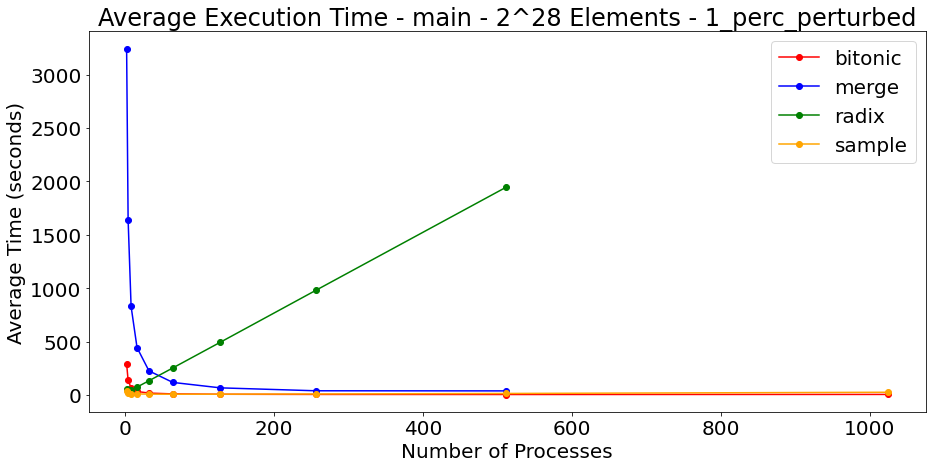

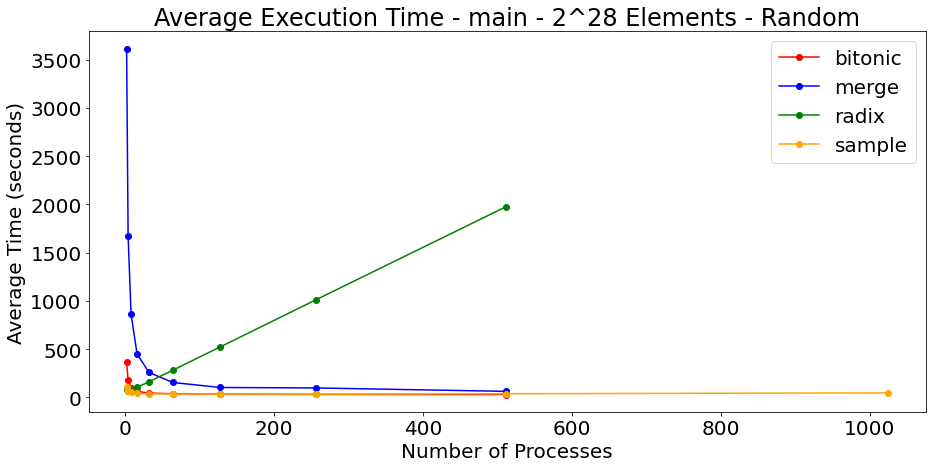

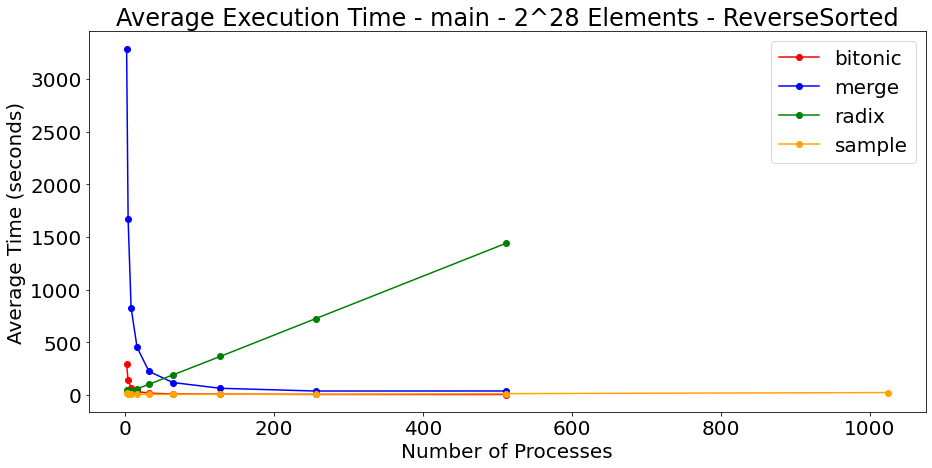

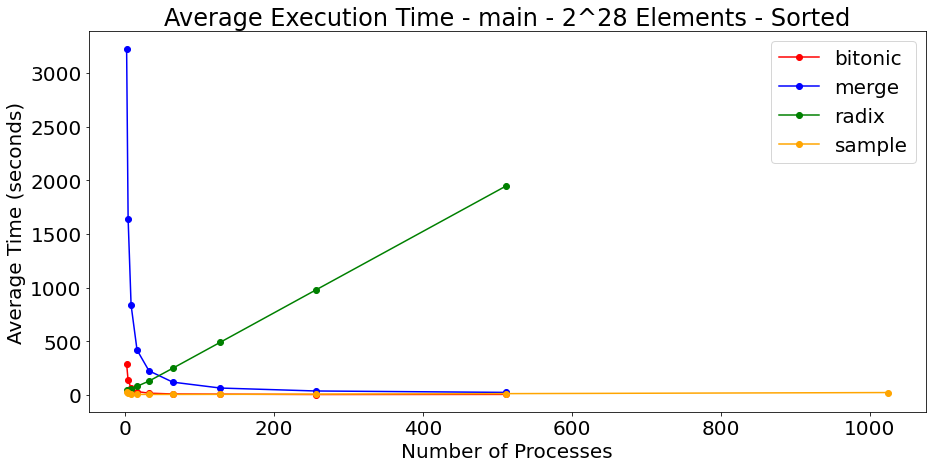

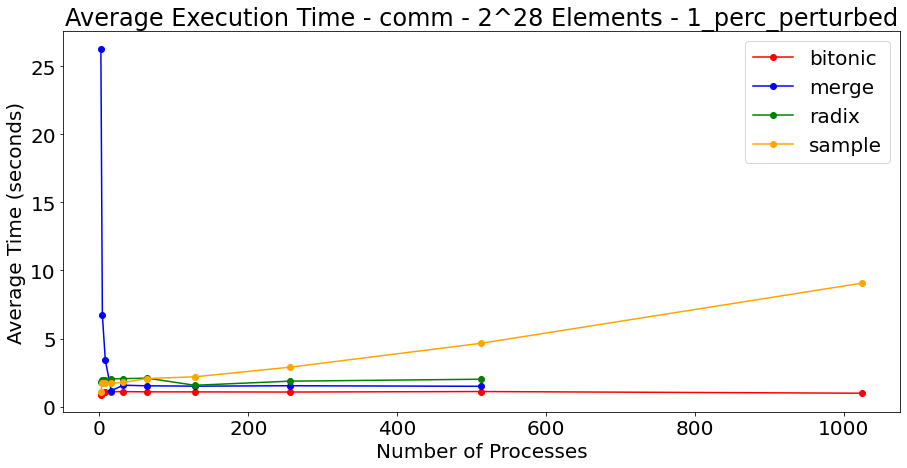

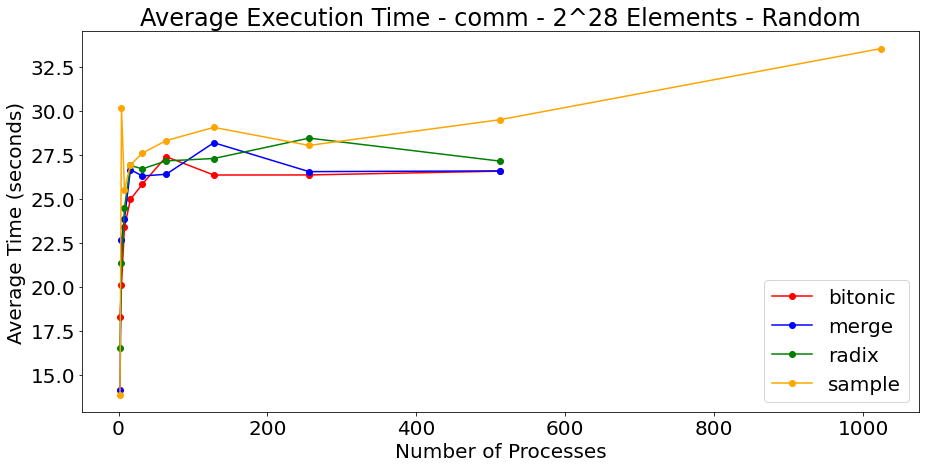

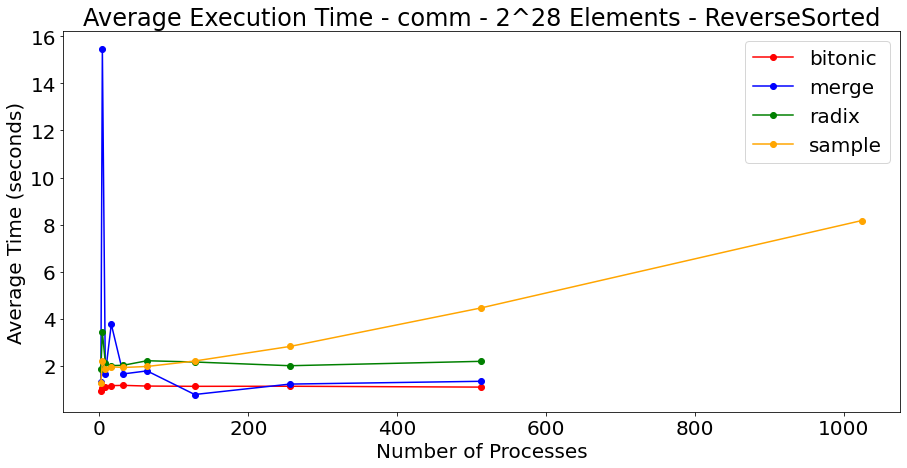

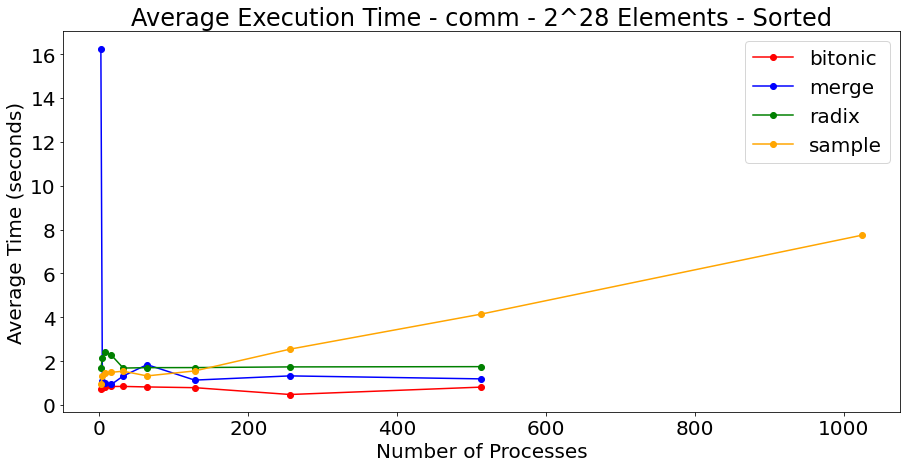

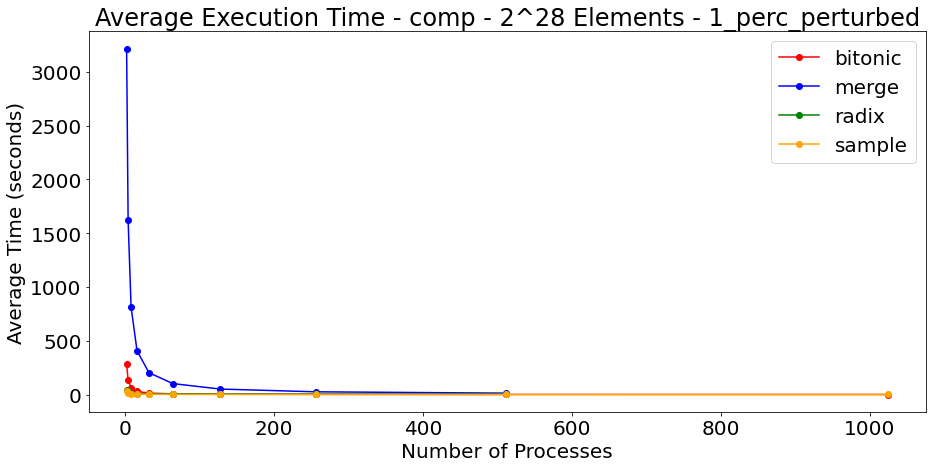

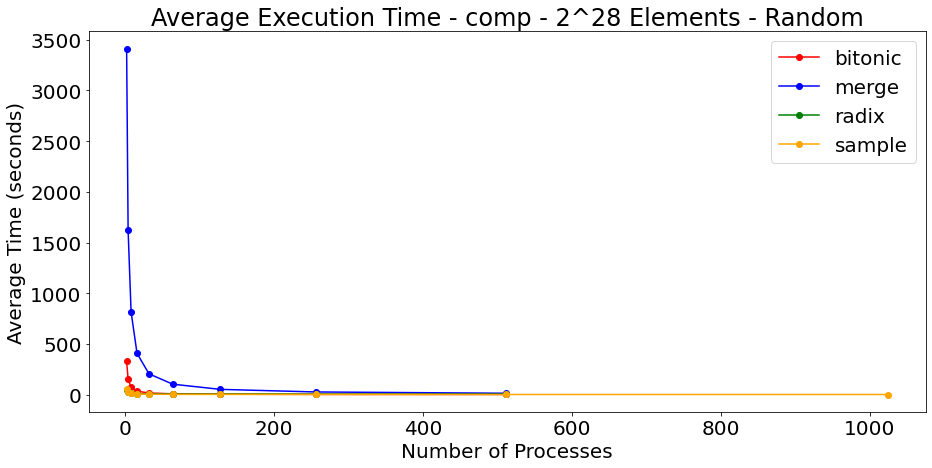

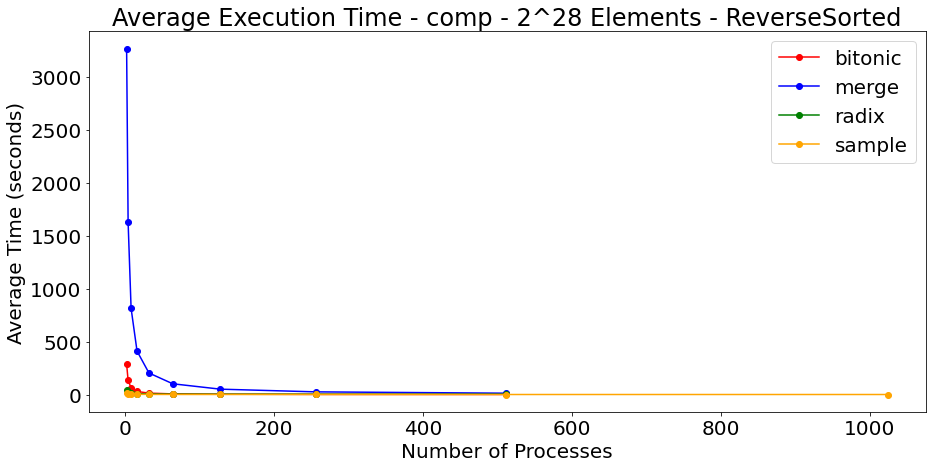

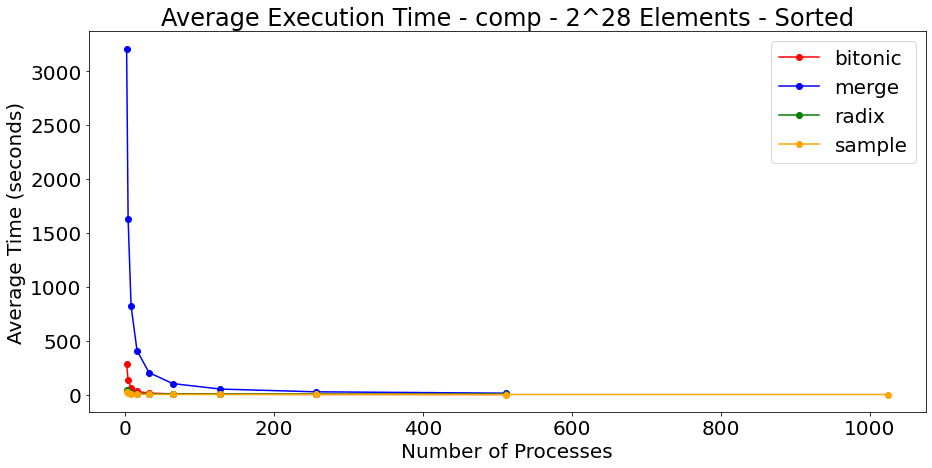

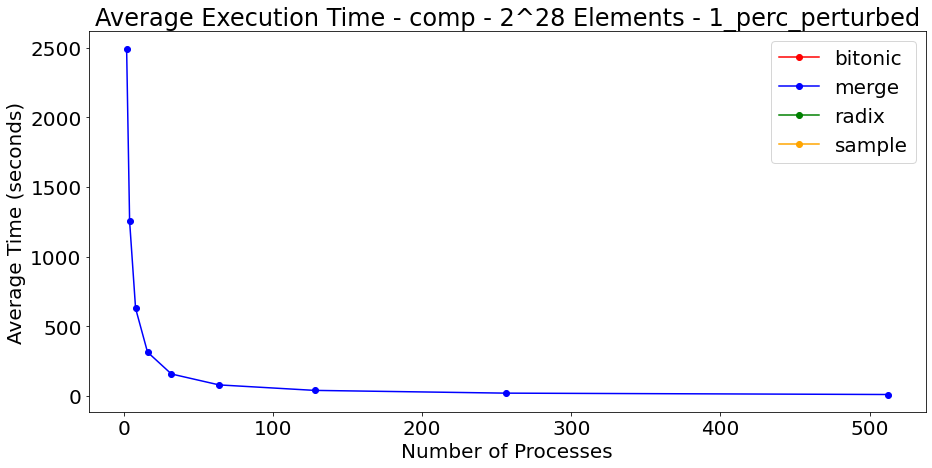

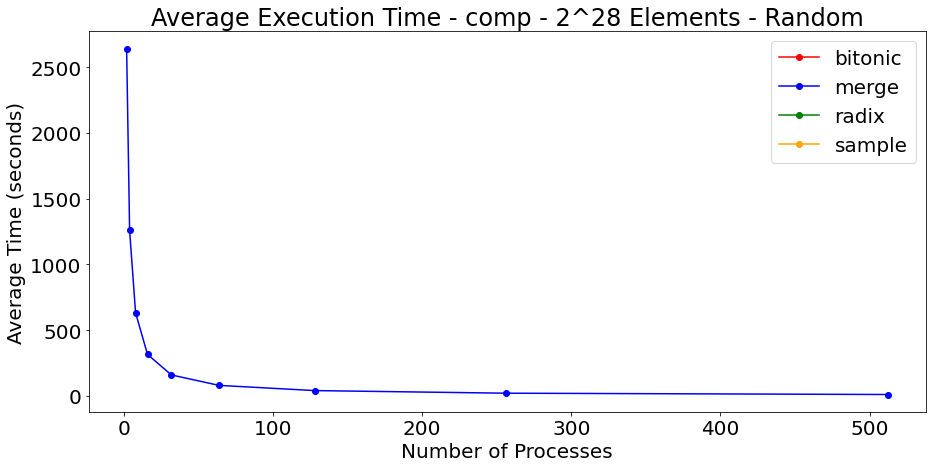

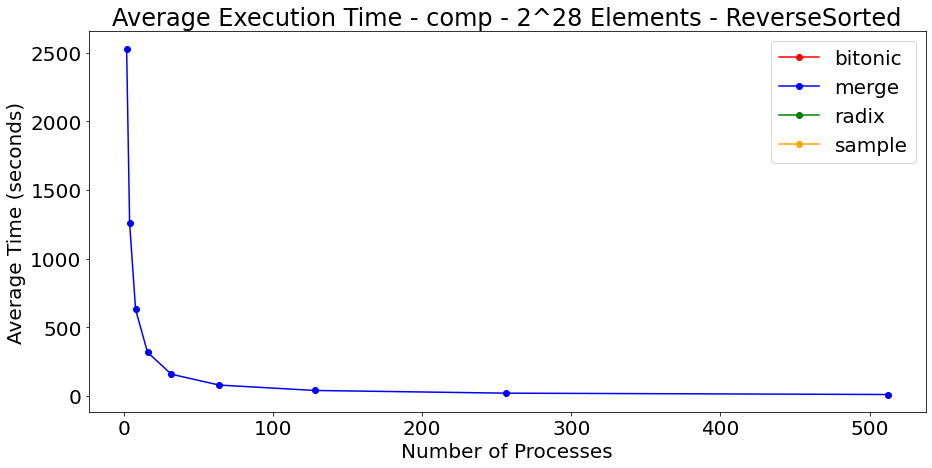

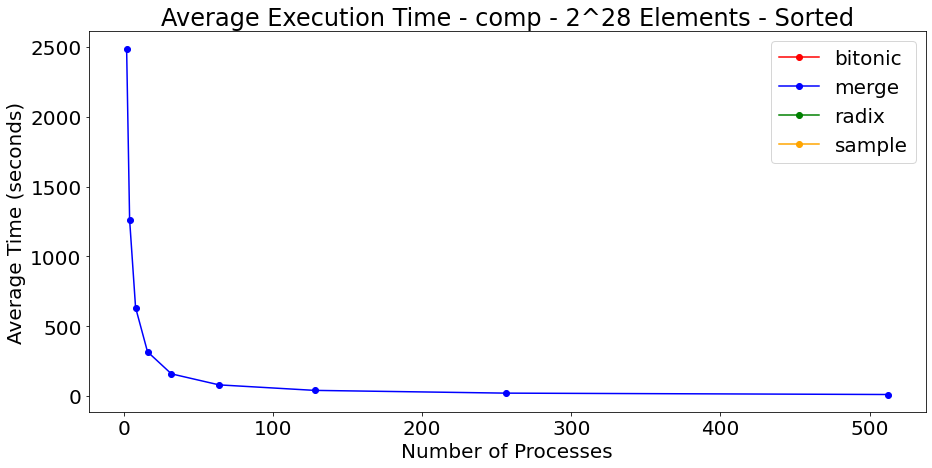

In [8]:
important_names = ["comm", "comp" , "main"]
important_size = input_sizes[-1]


for node in tk.graph.traverse():
    if node.frame["name"] not in important_names:
        continue

    node_df = tk.dataframe.loc[node, ["Avg time/rank"]].unstack(level="input_size").unstack(level="input_type").unstack(level="algorithm")
    for input_type in input_types:
        region_name = node.frame["name"]
        input_size_exp = int(log2(important_size))

        # if region_name == "main":
        #     mat_df_radix = node_df[[("Avg time/rank", important_size, input_type, "radix")]]
        #     mat_df_radix.columns = ["radix"]

        #     plot_pandas(
        #         df=mat_df_radix,
        #         title=f"Average Execution Time - {region_name} - 2^{input_size_exp} Elements - {input_type}",
        #         xlabel="Number of Processes",
        #         ylabel="Average Time (seconds)",
        #     )

        #     mat_df_no_radix = node_df[[("Avg time/rank", important_size, input_type, algo) for algo in algorithms if algo != "radix"]]
        #     mat_df_no_radix.columns = [algo for algo in algorithms if algo != "radix"]

        #     plot_pandas(
        #         df=mat_df_no_radix,
        #         title=f"Average Execution Time - {region_name} - 2^{input_size_exp} Elements - {input_type}",
        #         xlabel="Number of Processes",
        #         ylabel="Average Time (seconds)",
        #     )

        
        mat_df = node_df[[("Avg time/rank", important_size, input_type, algo) for algo in algorithms]]
        mat_df.columns = algorithms
        
        plot_pandas(
            df=mat_df,
            title=f"Average Execution Time - {region_name} - 2^{input_size_exp} Elements - {input_type}",
            xlabel="Number of Processes",
            ylabel="Average Time (seconds)",
        )

Strong Scaling - Speedup

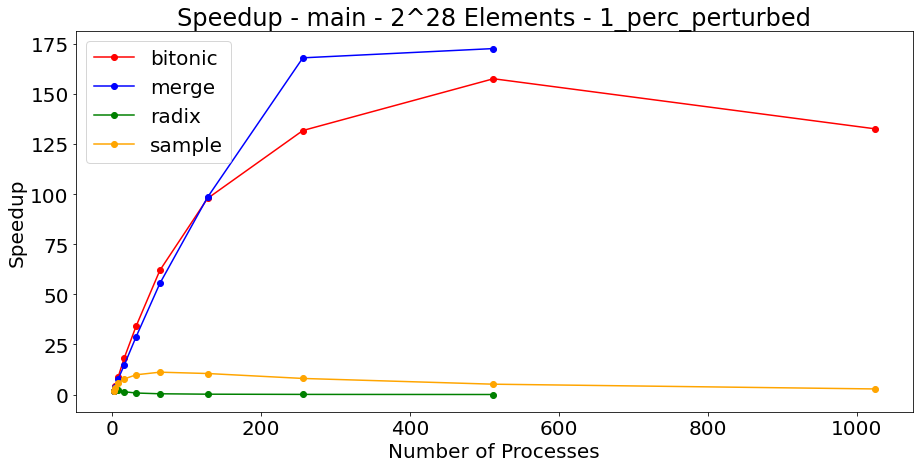

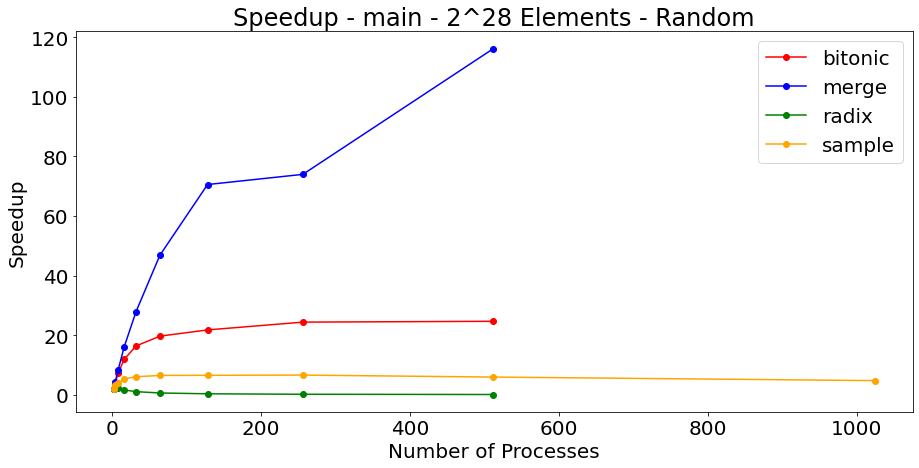

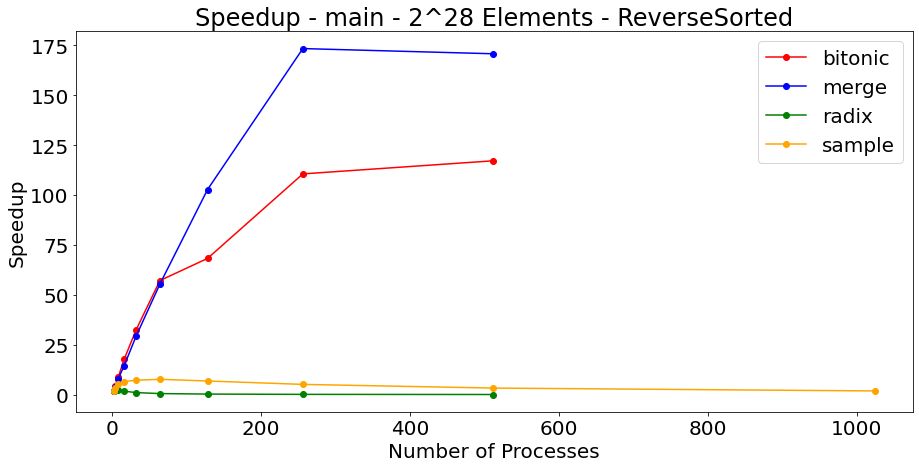

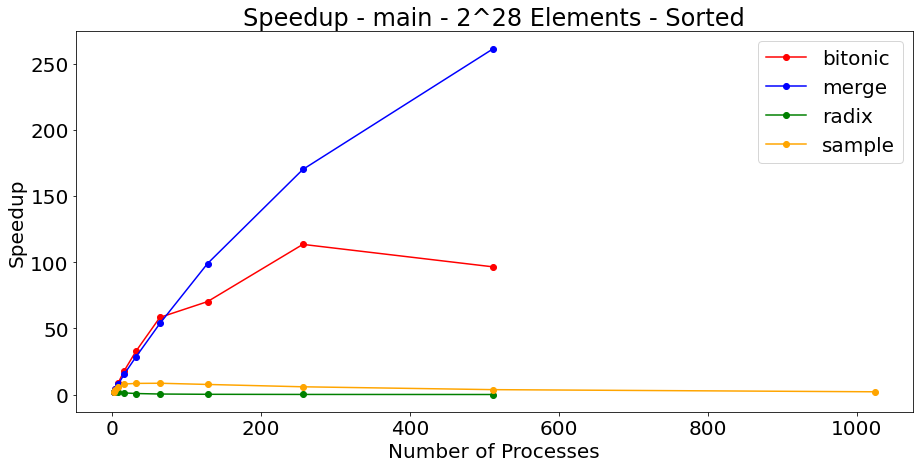

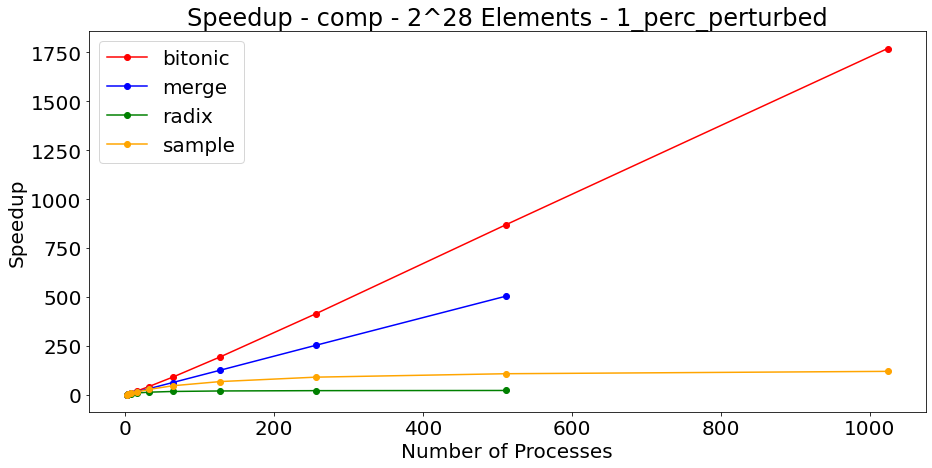

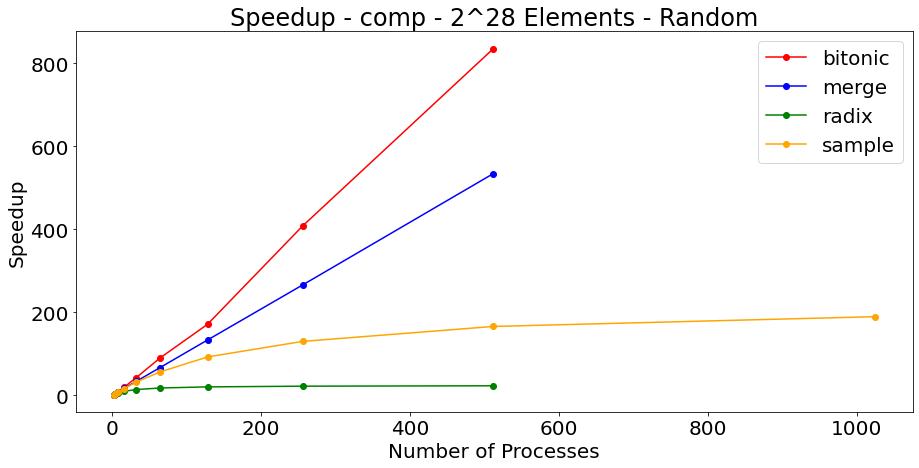

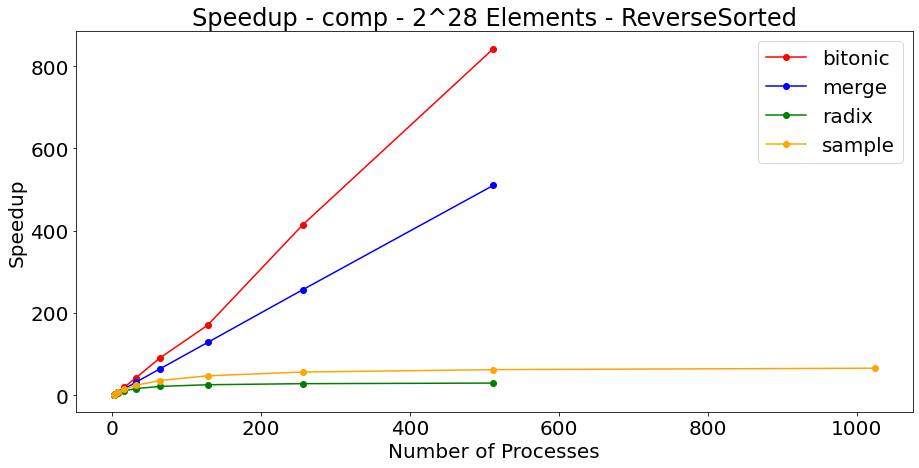

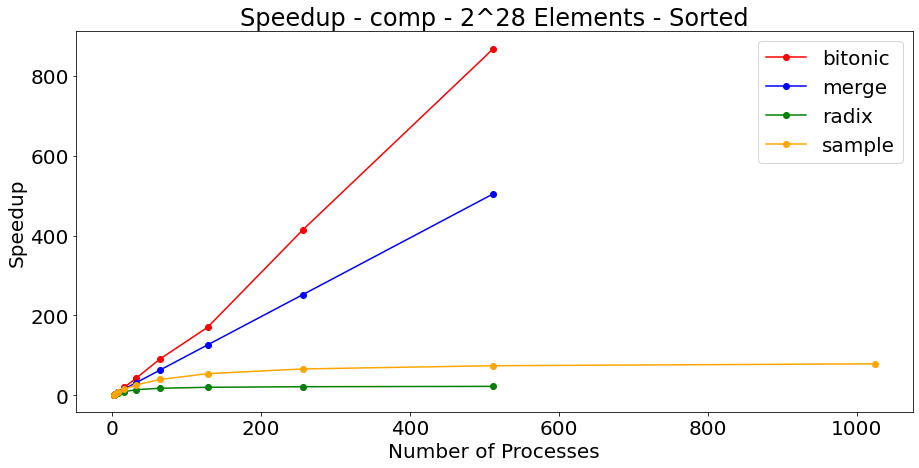

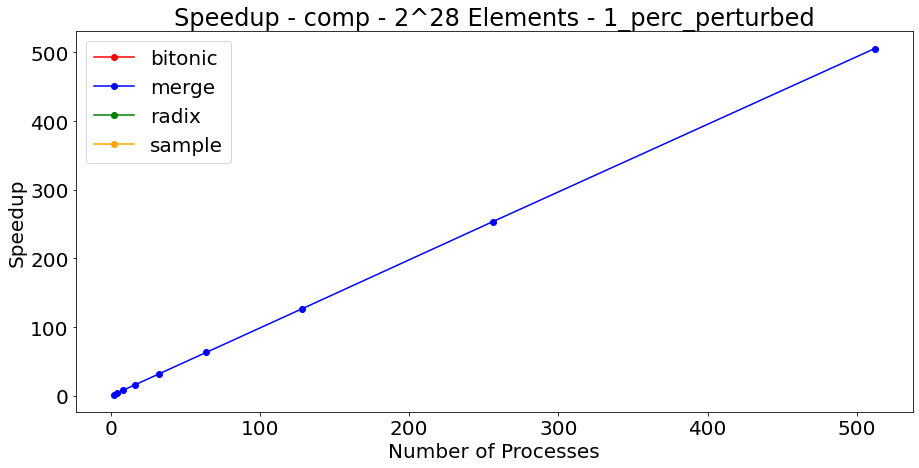

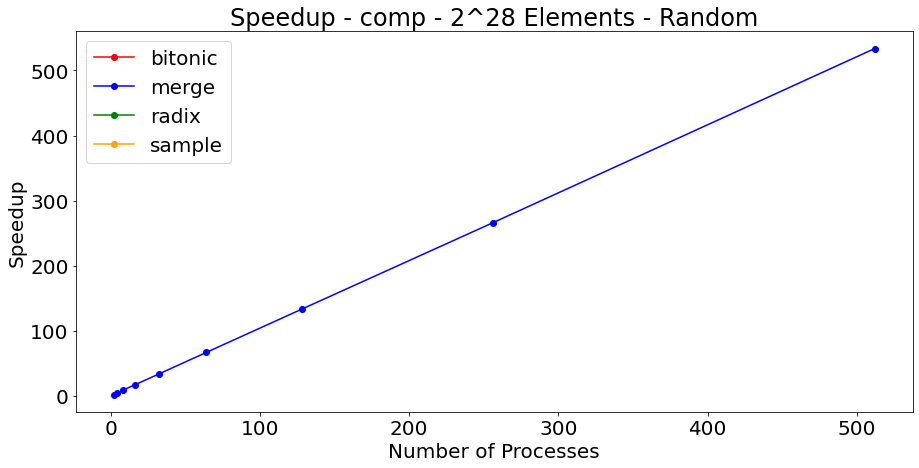

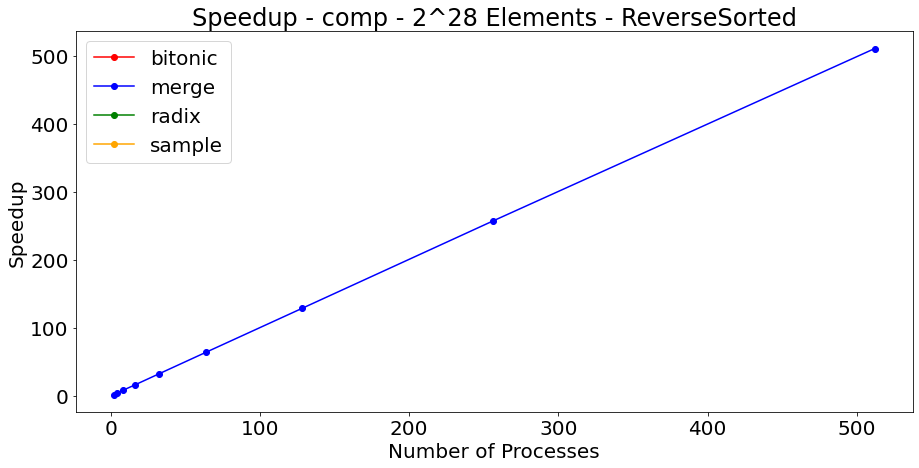

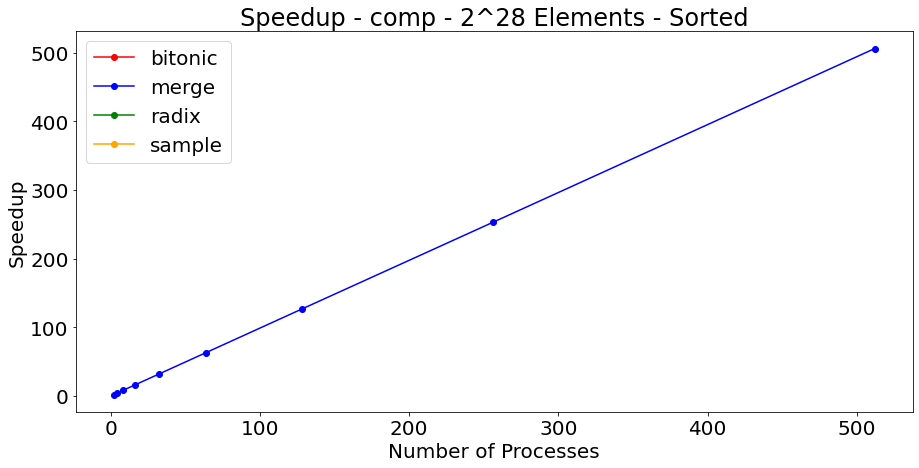

In [9]:
important_names = ["main", "comp"]
important_size = input_sizes[-1]

def convert_to_speedup_df(df, algos = algorithms):
    for input_type in input_types:
        for algo in algos:
            df[[("Avg time/rank", important_size, input_type, algo)]] = df.index[0] * df[[("Avg time/rank", important_size, input_type, algo)]].iloc[0] / df[[("Avg time/rank", important_size, input_type, algo)]]

        # df[("Avg time/rank", important_size, input_type, "ideal")] = df.index

for node in tk.graph.traverse():
    if node.frame["name"] not in important_names:
        continue

    node_df = tk.dataframe.loc[node, ["Avg time/rank"]].unstack(level="input_size").unstack(level="input_type").unstack(level="algorithm")
    
    convert_to_speedup_df(node_df)
    for input_type in input_types:
        region_name = node.frame["name"]
        input_size_exp = int(log2(important_size))
        
        mat_df = node_df[[("Avg time/rank", important_size, input_type, algo) for algo in algorithms]]
        mat_df.columns = algorithms
        # mat_df["ideal"] = node_df[("Avg time/rank", important_size, input_type, "ideal")]
        
        plot_pandas(
            df=mat_df,
            title=f"Speedup - {region_name} - 2^{input_size_exp} Elements - {input_type}",
            xlabel="Number of Processes",
            ylabel="Speedup",
        )

Weak Scaling

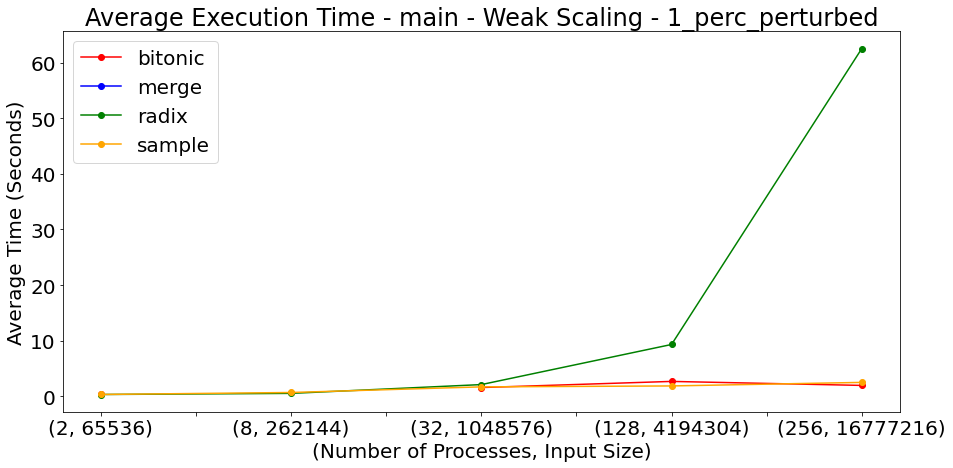

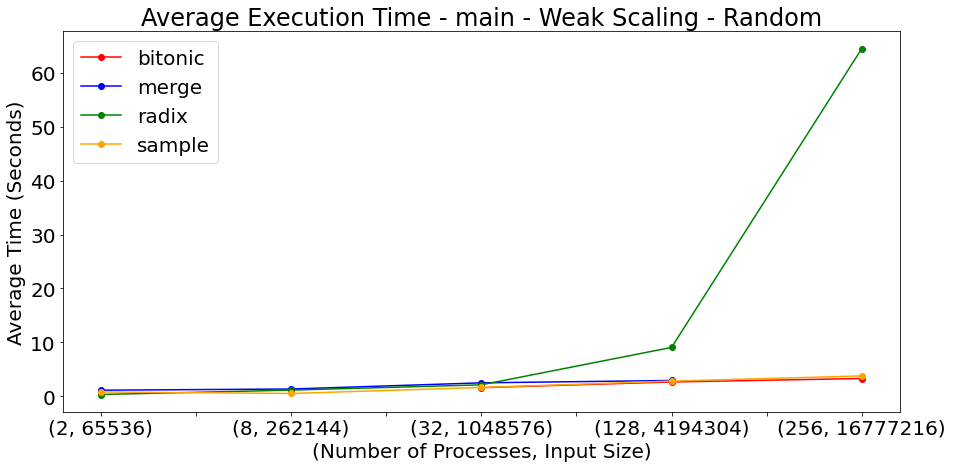

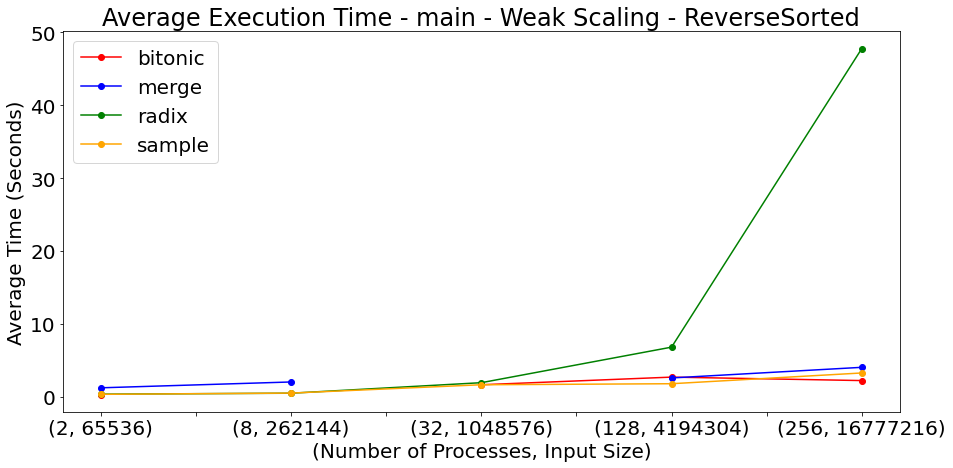

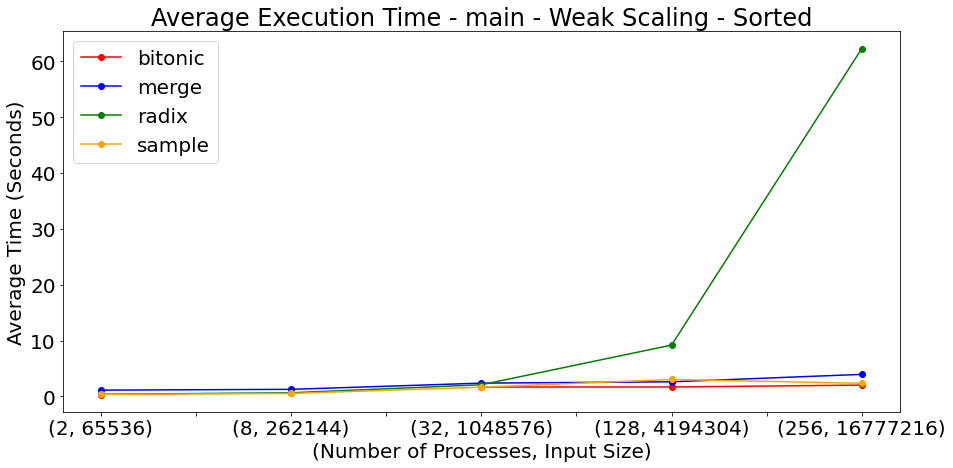

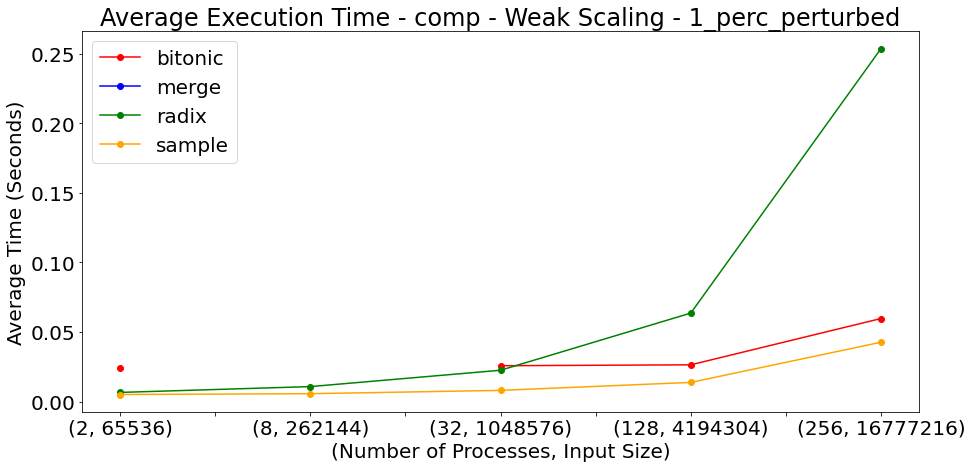

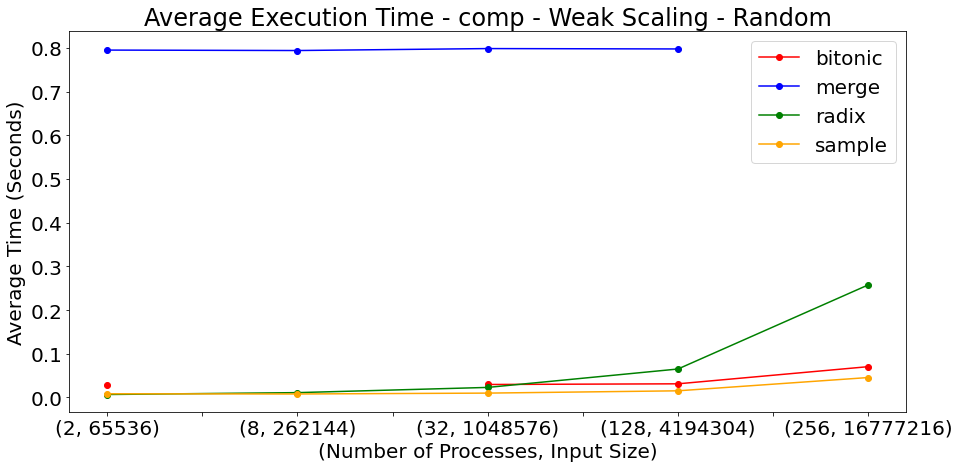

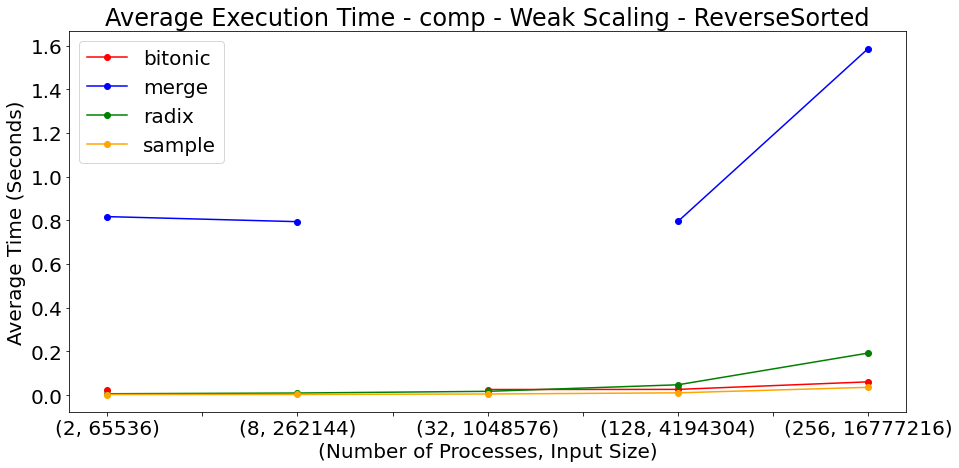

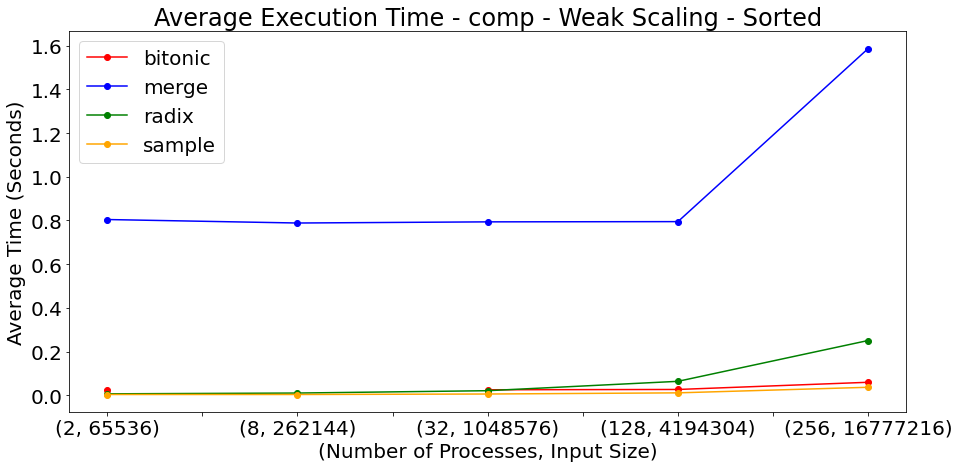

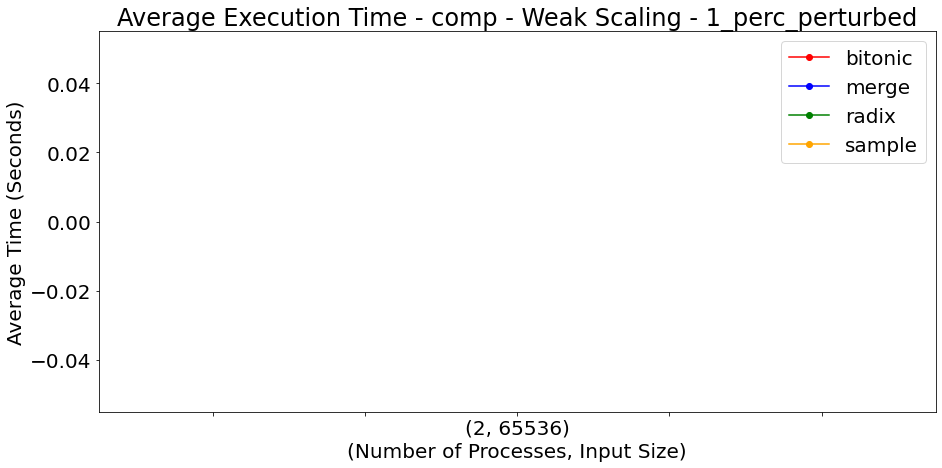

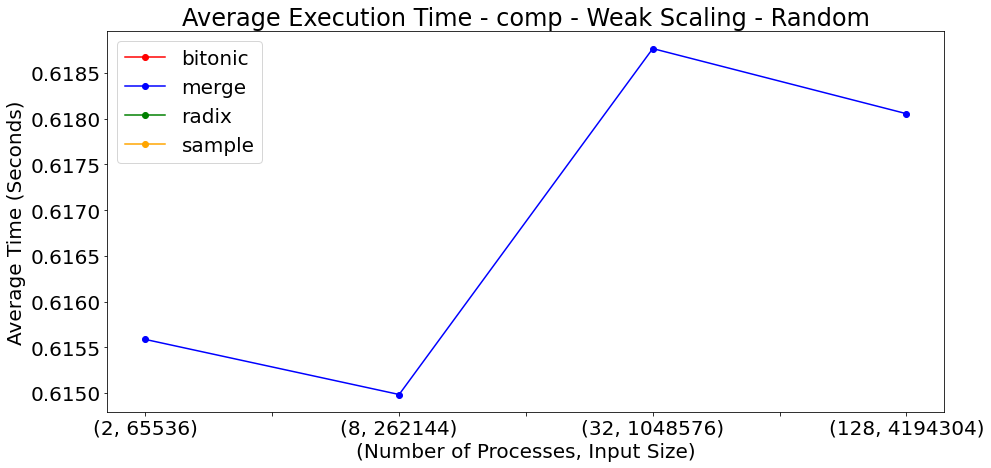

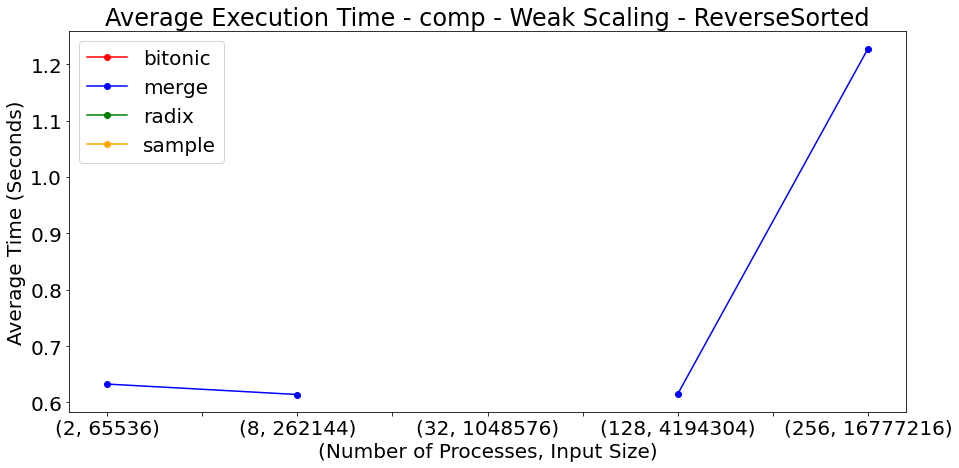

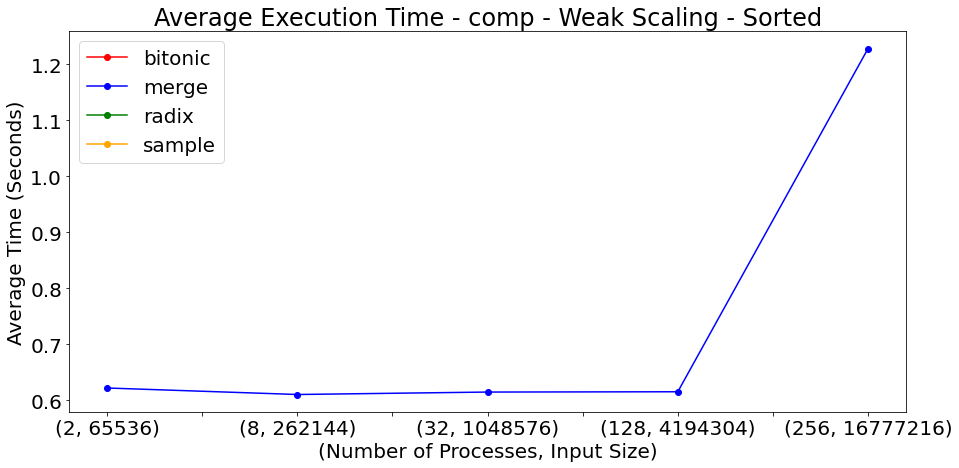

In [11]:
important_names = ["main", "comp"]
important_pairs = [(2, 2 ** 16), (8, 2 ** 18), (32, 2 ** 20), (128, 2 ** 22), (256, 2 ** 24)]

for node in tk.graph.traverse():
    if node.frame["name"] not in important_names:
        continue

    node_df = tk.dataframe.loc[node, ["Avg time/rank"]].unstack(level="input_type").unstack(level="algorithm")
    node_df = node_df.loc[important_pairs,]
    region_name = node.frame["name"]
    for input_type in input_types:
        mat_df = node_df[[("Avg time/rank", input_type, algo) for algo in algorithms]]
        mat_df.columns = algorithms
        print('\n')

        plot_pandas(
            df=mat_df,
            title=f"Average Execution Time - {region_name} - Weak Scaling - {input_type}",
            xlabel="(Number of Processes, Input Size)",
            ylabel="Average Time (Seconds)",
        )